## Importing Libraries

In [ ]:
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix,classification_report

## Download and prepare the MNIST dataset

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


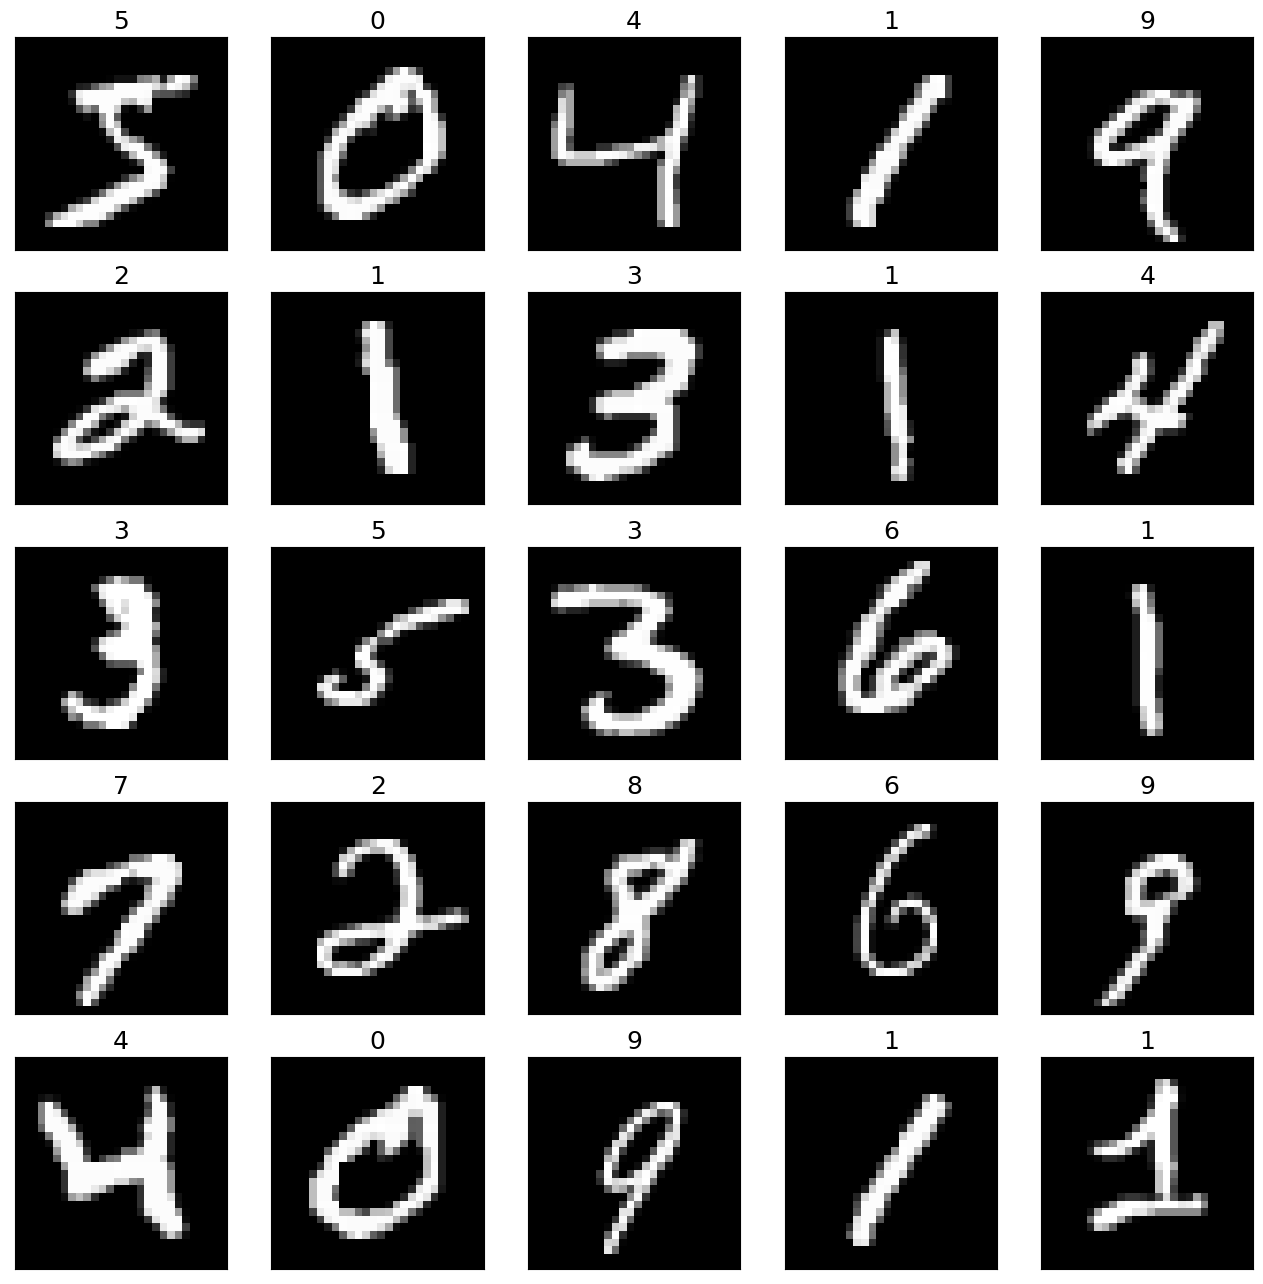

In [3]:
plt.figure(figsize=(16,16))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i],fontsize=18)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

##  Create the convolutional base,compiling & training a model

In [4]:
x_train=x_train[:5000,:,:]
y_train=y_train[:5000]

x_test=x_test[:1000,:,:]
y_test=y_test[:1000]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5000, 28, 28)
(5000,)
(1000, 28, 28)
(1000,)


In [5]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data
x_train = np.reshape(x_train, (5000, 28, 28, 1))
x_test = np.reshape(x_test, (1000, 28, 28, 1))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


In [6]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [8]:
h2=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
157/157 [==============================] - 11s 43ms/step - loss: 1.0285 - acc: 0.6658 - val_loss: 0.4656 - val_acc: 0.8630
Epoch 2/20
157/157 [==============================] - 7s 43ms/step - loss: 0.2954 - acc: 0.9098 - val_loss: 0.2857 - val_acc: 0.9140
Epoch 3/20
157/157 [==============================] - 5s 30ms/step - loss: 0.2170 - acc: 0.9350 - val_loss: 0.2460 - val_acc: 0.9260
Epoch 4/20
157/157 [==============================] - 4s 25ms/step - loss: 0.1744 - acc: 0.9478 - val_loss: 0.2169 - val_acc: 0.9350
Epoch 5/20
157/157 [==============================] - 4s 24ms/step - loss: 0.1541 - acc: 0.9502 - val_loss: 0.2333 - val_acc: 0.9230
Epoch 6/20
157/157 [==============================] - 4s 24ms/step - loss: 0.1274 - acc: 0.9576 - val_loss: 0.1580 - val_acc: 0.9520
Epoch 7/20
157/157 [==============================] - 4s 26ms/step - loss: 0.1084 - acc: 0.9694 - val_loss: 0.1702 - val_acc: 0.9500
Epoch 8/20
157/157 [==============================] - 4s 25ms/step -

In [57]:
df=pd.DataFrame(h2.history)
df['Epochs']=h2.epoch
df

,loss,acc,val_loss,val_acc,Epochs
0,1.028510,0.6658,0.465604,0.863,0
1,0.295446,0.9098,0.285653,0.914,1
2,0.217021,0.9350,0.245965,0.926,2
3,0.174374,0.9478,0.216925,0.935,3
4,0.154102,0.9502,0.233312,0.923,4
5,0.127419,0.9576,0.157982,0.952,5
6,0.108354,0.9694,0.170164,0.950,6
7,0.092673,0.9710,0.171681,0.950,7
8,0.081333,0.9756,0.204909,0.928,8
9,0.074355,0.9764,0.157515,0.955,9


##  Data Analysis and Visulizations

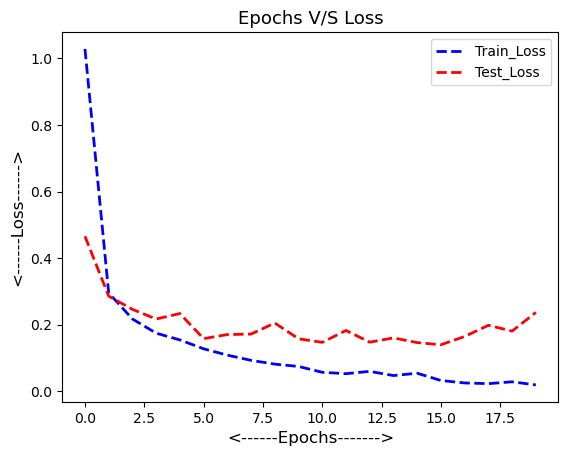

In [90]:
plt.plot(df['Epochs'],df['loss'],'b--',linewidth=2,label='Train_Loss')
plt.plot(df['Epochs'],df['val_loss'],'r--',linewidth=2,label='Test_Loss')

plt.title("Epochs V/S Loss",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Loss------>',fontsize=12)

plt.legend(loc='upper right')

plt.show()

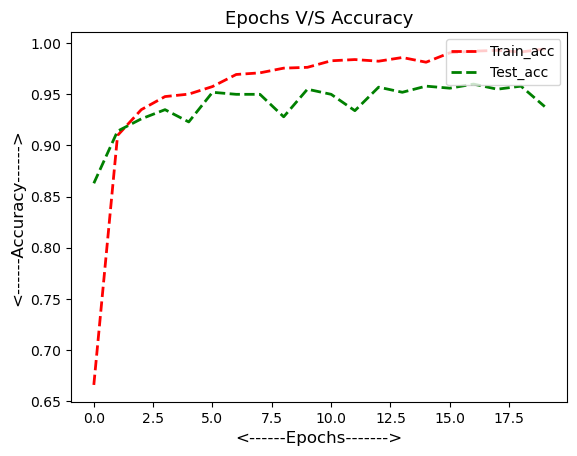

In [89]:
plt.plot(df['Epochs'],df['acc'],'r--',linewidth=2,label='Train_acc')
plt.plot(df['Epochs'],df['val_acc'],'g--',linewidth=2,label='Test_acc')

plt.title("Epochs V/S Accuracy",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Accuracy------>',fontsize=12)

plt.legend(loc='upper right')

plt.show()

<IPython.core.display.Javascript object>

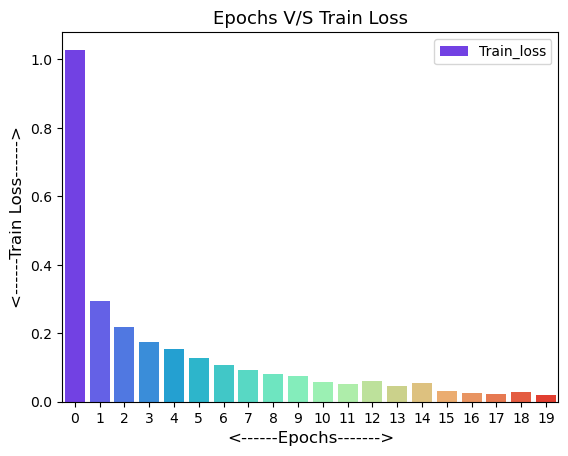

In [85]:
sns.barplot(x='Epochs',y='loss',data=df,orient='v', palette='rainbow',label='Train_loss')

plt.title("Epochs V/S Train Loss",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Train Loss------>',fontsize=12)

plt.legend(loc='upper right')
plt.show()

<IPython.core.display.Javascript object>

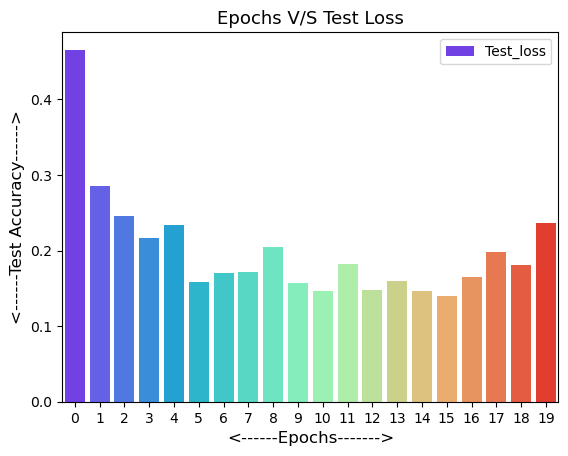

In [83]:
sns.barplot(x='Epochs',y='val_loss',data=df,orient='v', palette='rainbow',label='Test_loss')

plt.title("Epochs V/S Test Loss",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Test Accuracy------>',fontsize=12)

plt.legend(loc='upper right')
plt.show()

<IPython.core.display.Javascript object>

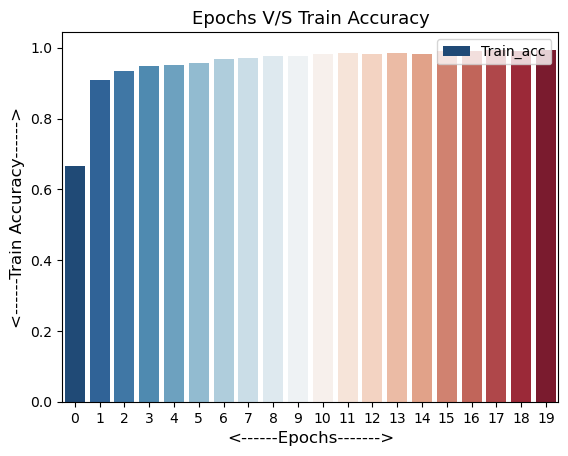

In [84]:
sns.barplot(x='Epochs',y='acc',data=df,orient='v', palette='RdBu_r',label='Train_acc')

plt.title("Epochs V/S Train Accuracy",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Train Accuracy------>',fontsize=12)

plt.legend(loc='upper right')
plt.show()

<IPython.core.display.Javascript object>

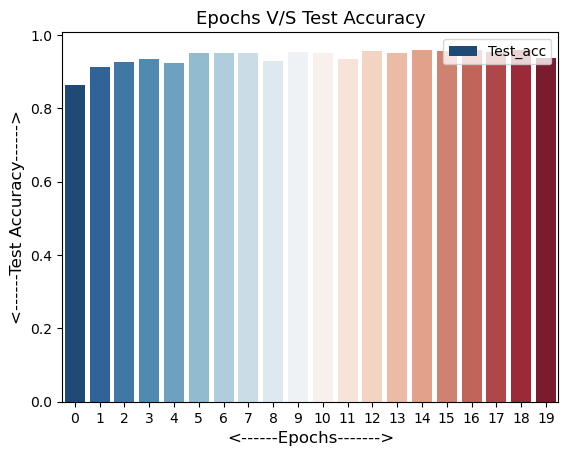

In [91]:
sns.barplot(x='Epochs',y='val_acc',data=df,orient='v', palette='RdBu_r',label='Test_acc')

plt.title("Epochs V/S Test Accuracy",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Test Accuracy------>',fontsize=12)

plt.legend(loc='upper right')
plt.show()

## Generate Predictions on test_data

In [16]:
ypred_model=model.predict(x_test)
print(ypred_model[:10])

32/32 [==============================] - 0s 7ms/step
[[6.68093303e-10 3.52768620e-06 5.17231956e-06 8.35751416e-05
  3.18061105e-15 1.67345769e-15 8.12614272e-19 9.99896407e-01
  7.70369393e-11 1.13369188e-05]
 [1.61098939e-08 4.48899073e-06 9.99961972e-01 2.61301270e-09
  1.03426764e-11 9.19249282e-16 3.10910224e-07 2.69482131e-10
  1.22316934e-10 3.31518822e-05]
 [8.71930581e-07 9.99897599e-01 2.25936283e-08 3.78022236e-08
  9.78378521e-05 8.74217765e-09 2.18676746e-06 8.24624749e-07
  1.69462425e-07 4.44860177e-07]
 [9.99405146e-01 1.53786317e-10 2.20415700e-06 2.37969993e-14
  1.12816554e-06 6.26078372e-14 5.47067316e-08 2.95943661e-08
  6.91504688e-13 5.91564632e-04]
 [5.96181664e-08 2.17836586e-07 1.29785641e-10 4.20958964e-17
  9.99168515e-01 5.50511344e-14 1.20131158e-08 1.06434818e-11
  1.10349765e-13 8.31169891e-04]
 [2.70568346e-09 9.99999762e-01 9.26591356e-12 3.50088541e-10
  1.97126170e-07 1.02578156e-12 9.41534295e-10 2.55783412e-08
  9.03359609e-11 2.83314794e-09]
 [9.6

In [17]:
ypred = [np.argmax(i) for i in ypred_model]

print(ypred[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


## Compute  Confusion matrix and classification report

In [20]:
cm=confusion_matrix(y_test,ypred)

print(cm)
print(classification_report(y_test,ypred))

[[ 61   0   0   0   4   0   0   0   0  20]
 [  0 126   0   0   0   0   0   0   0   0]
 [  0   0 108   1   0   0   2   4   0   1]
 [  0   0   1 103   0   2   0   0   1   0]
 [  0   0   1   0 107   0   0   0   0   2]
 [  0   0   0   2   0  84   0   0   1   0]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   0   0   0   1   0   0  96   0   2]
 [  0   3   2   1   0   0   0   0  77   6]
 [  0   1   0   0   0   1   0   0   0  92]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.82        85
           1       0.97      1.00      0.98       126
           2       0.96      0.93      0.95       116
           3       0.96      0.96      0.96       107
           4       0.95      0.97      0.96       110
           5       0.97      0.97      0.97        87
           6       0.98      0.97      0.97        87
           7       0.96      0.97      0.96        99
           8       0.97      0.87      0.92        89
           9       0.75     